In [1]:
import numpy as np
from matplotlib.image import imread
image_raw=imread('/kaggle/input/tanjiro/download.png')
image_raw

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

In [2]:
image_raw.shape ##image shape

(225, 225, 4)

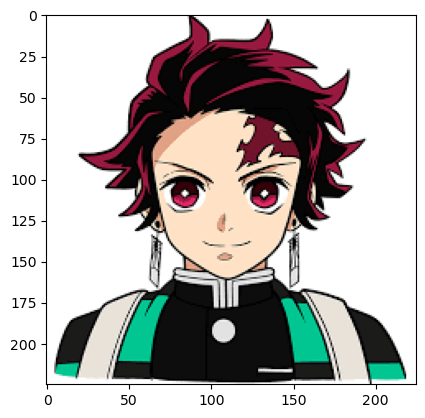

In [3]:
import matplotlib.pyplot as plt
plt.imshow(image_raw)  ##original image

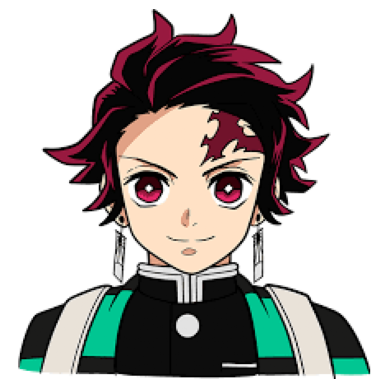

In [4]:
plt.imshow(image_raw)
plt.axis(False)
plt.show()

In [5]:
i=image_raw.sum(axis=2)  #print the two axes
i.shape

(225, 225)

In [6]:
ib=i/i.max()
ib.max()

1.0

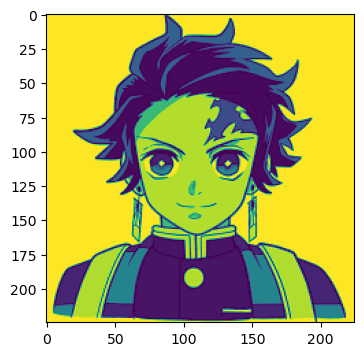

In [7]:
plt.figure(figsize=(6,4))
plt.imshow(ib)

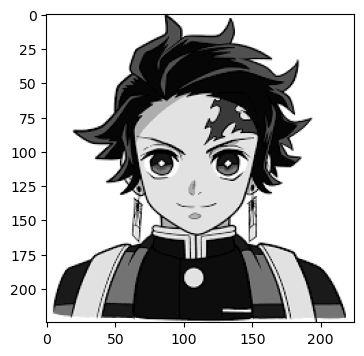

In [8]:
plt.figure(figsize=(6,4))
plt.imshow(ib,cmap=plt.cm.gray) #gray image

In [9]:
from sklearn.decomposition import PCA, IncrementalPCA
pca=PCA()
pca.fit(ib)
var=np.cumsum(pca.explained_variance_ratio_)*100
k=np.argmax(var>95)
print("elements are "+str(k))

elements are 38


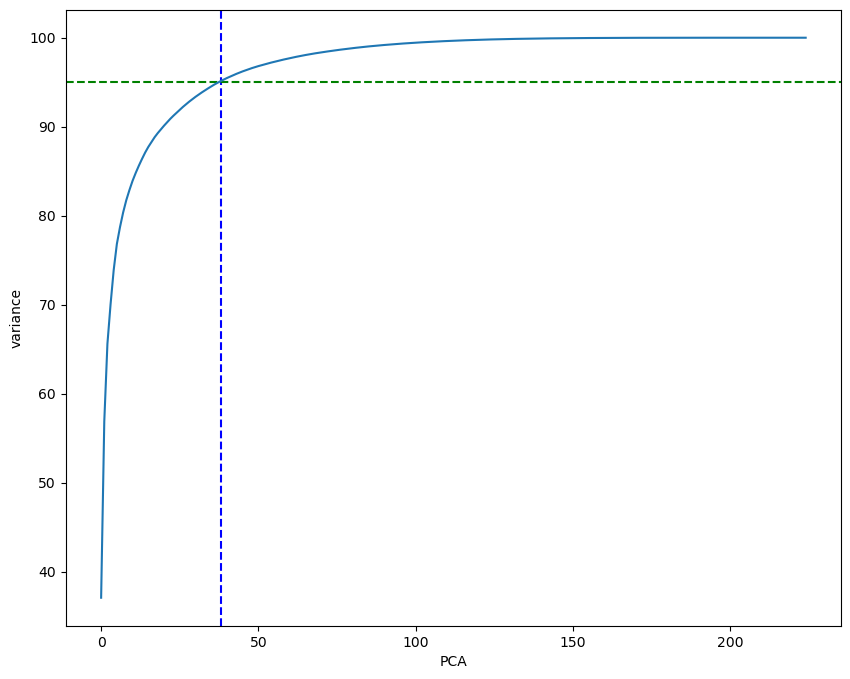

In [10]:
plt.figure(figsize=(10,8))
plt.ylabel('variance')
plt.xlabel('PCA')
plt.axvline(x=k,color='b',linestyle='--')
plt.axhline(y=95,color='g',linestyle='--')
ax=plt.plot(var)

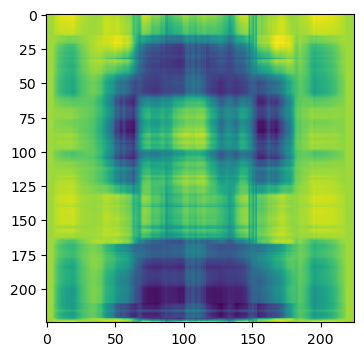

In [11]:
ipca=IncrementalPCA(n_components=2)
i=ipca.inverse_transform(ipca.fit_transform(ib))
plt.figure(figsize=(6,4))
plt.imshow(i)

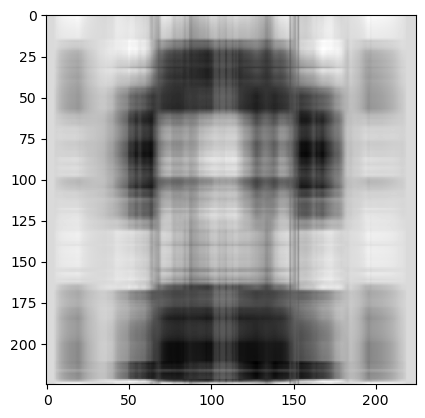

In [12]:
plt.imshow(i,cmap=plt.cm.gray)

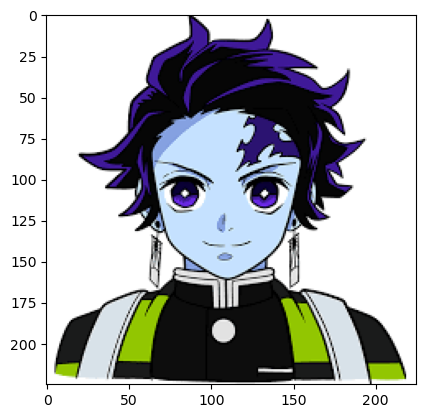

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
o_img=cv2.imread('/kaggle/input/tanjiro/download.png')
img=cv2.cvtColor(o_img,cv2.COLOR_BGR2RGB)
v=img.reshape(-1,3)
plt.imshow(o_img)

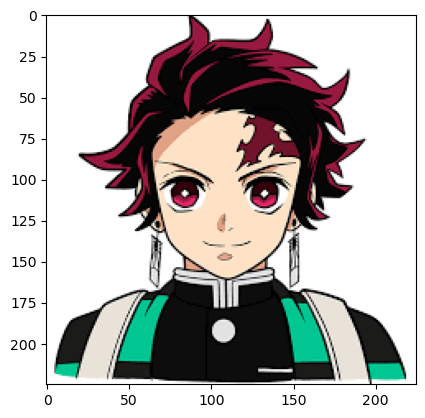

In [14]:
plt.imshow(img)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x715b03369d10>)

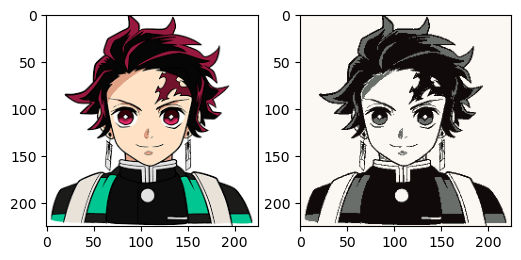

In [15]:
import numpy as np
v=np.float32(v)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
k=3
attempts=10
ret,label,center=cv2.kmeans(v,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
r=res.reshape(img.shape)
f1=6
f2=4
plt.figure(figsize=(f1,f2))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(r)

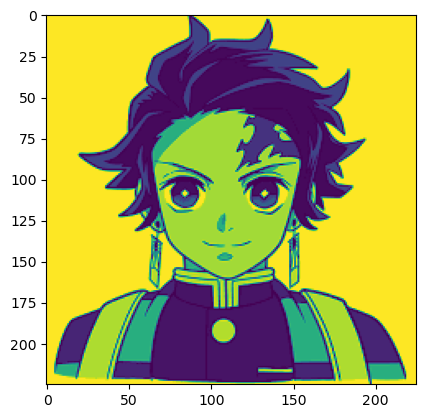

In [16]:
gray_image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2GRAY) #convert to grey image
plt.imshow(gray_image)

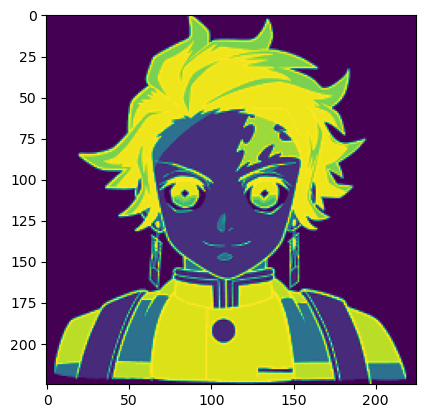

In [17]:
inverted_image=255-gray_image ##converting to invert image
plt.imshow(inverted_image)

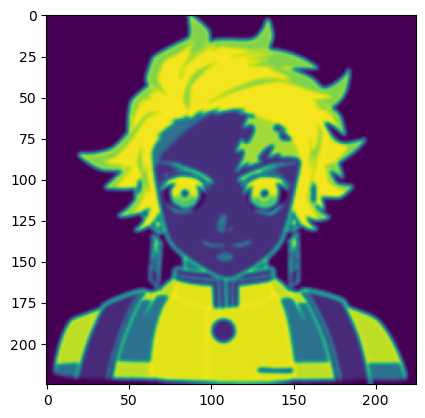

In [18]:
## guassian Blur image
gblur_image1=cv2.GaussianBlur(inverted_image,(5,5),0) #kernel size
plt.imshow(gblur_image1)

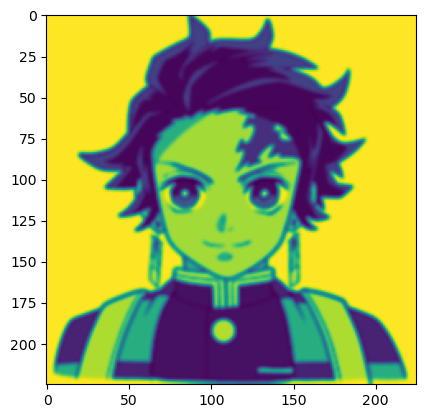

In [19]:
#inverted Gaussian Blur image
invgblur_image=255-gblur_image1
plt.imshow(invgblur_image)

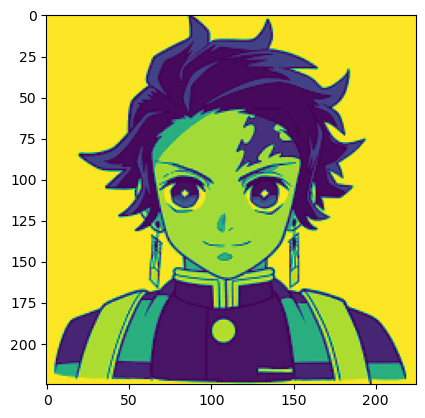

In [20]:
blur_image=255-inverted_image
p_image=255-blur_image
pencil_sketch1=cv2.divide(gray_image,p_image,scale=256.0)
plt.imshow(pencil_sketch1)

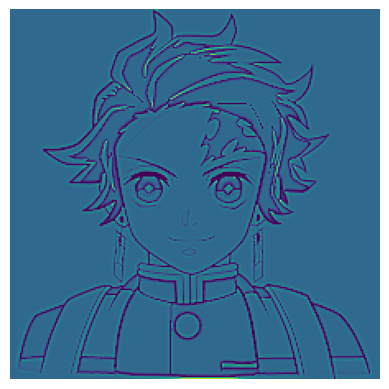

In [21]:
sketch_img=cv2.divide(gray_image,invgblur_image,scale=256.0)
plt.axis(False)
plt.imshow(sketch_img)

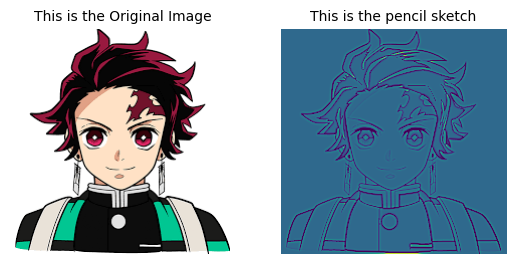

In [22]:
#original image vs pencil sketch image comparision
plt.subplot(1,2,1)
plt.title('This is the Original Image',size=10)
plt.imshow(image_raw)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('This is the pencil sketch',size=10)
plt.imshow(sketch_img)
plt.axis('off')
plt.show()

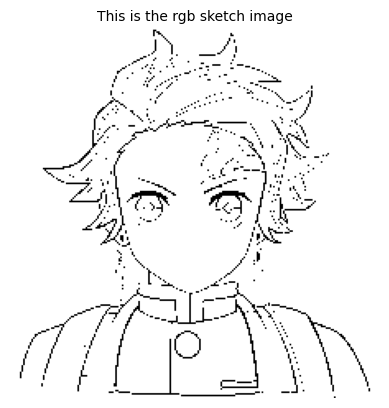

In [23]:
plt.title('This is the rgb sketch image',size=10)
sketch=cv2.cvtColor(sketch_img,cv2.COLOR_BGR2RGB)
plt.imshow(sketch)
plt.axis('off')
plt.show()